# Assignment: Build a Regression Model in Keras

## A. Build a baseline model (5 marks)

### Download dataset

In [1]:
import pandas as pd

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
X = concrete_data.iloc[:, :-1]
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
y = concrete_data['Strength']
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

### Build a neural network

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

In [7]:
import keras
from keras.layers import Dense

In [8]:
def regression_model():
    model = keras.Sequential()
    model.add(Dense(10, activation="relu", input_shape=(X.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mean_squared_error")

    return model

In [9]:
model_A = regression_model()
model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (721, 8)
X_test shape: (309, 8)
y_train shape: (721,)
y_test shape: (309,)


### 2. Train the model on the training data using 50 epochs.

In [12]:
model_A.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
21/21 [==============================] - 3s 13ms/step - loss: 4396.6606 - val_loss: 1804.5492
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 2130.0420 - val_loss: 1636.8588
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 1834.1821 - val_loss: 1554.6543
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 1631.3318 - val_loss: 1415.9457
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 1482.7198 - val_loss: 1319.5862
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 1323.6559 - val_loss: 1187.4423
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 1178.5656 - val_loss: 1081.5500
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 1046.7411 - val_loss: 979.2678
Epoch 9/50
21/21 [==============================] - 0s 3ms/step - loss: 923.9979 - val_loss: 876.4014
Epoch 10/50
21/21 [==============================] - 0s 4ms/step -

### 3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
y_pred = model_A.predict(X_test)
mean_squared_error(y_test, y_pred)

10/10 [==============================] - 0s 2ms/step


129.81362725210153

### 4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

In [38]:
model_A = regression_model()
mean_squared_errors = []

In [39]:
def get_mean_squared_error(model, data, epochs=50):
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test)

    return mean_squared_error(y_test, y_pred)

In [16]:
for i in range(50):
    print('Iteration {}'.format(i+1))
    mean_squared_errors.append(get_mean_squared_error(model_A, (X, y)))

Iteration 1
10/10 [==============================] - 0s 2ms/step
Iteration 2
10/10 [==============================] - 0s 2ms/step
Iteration 3
10/10 [==============================] - 0s 2ms/step
Iteration 4
10/10 [==============================] - 0s 3ms/step
Iteration 5
10/10 [==============================] - 0s 2ms/step
Iteration 6
10/10 [==============================] - 0s 2ms/step
Iteration 7
10/10 [==============================] - 0s 2ms/step
Iteration 8
10/10 [==============================] - 0s 2ms/step
Iteration 9
10/10 [==============================] - 0s 2ms/step
Iteration 10
10/10 [==============================] - 0s 2ms/step
Iteration 11
10/10 [==============================] - 0s 2ms/step
Iteration 12
10/10 [==============================] - 0s 2ms/step
Iteration 13
10/10 [==============================] - 0s 2ms/step
Iteration 14
10/10 [==============================] - 0s 2ms/step
Iteration 15
10/10 [==============================] - 0s 2ms/step
Iteration 16
10/10 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

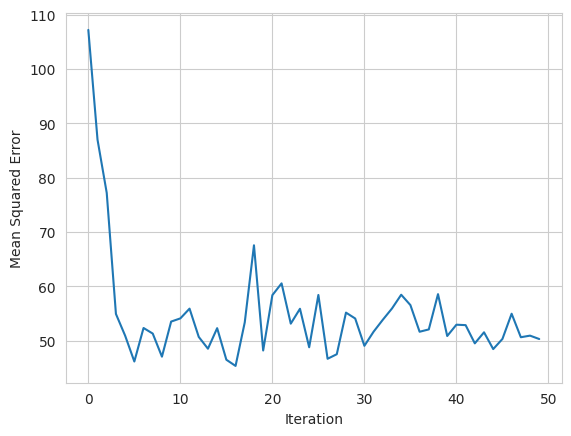

In [18]:
plt.figure()
plt.plot(mean_squared_errors)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.show()

### 5. Report the mean and the standard deviation of the mean squared errors.

In [19]:
import numpy as np

In [22]:
mean_MSEs_model_A = np.mean(mean_squared_errors)
print('Mean MSEs:', mean_MSEs_model_A)

Mean MSEs: 54.77260055969127


In [23]:
std_MSEs_model_A = np.std(mean_squared_errors)
print('Standard deviation MSEs:', std_MSEs_model_A)

Standard deviation MSEs: 10.363402467308651


## B. Normalize the data (5 marks)

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

In [24]:
X_normalized = (X - X.mean()) / X.std()
X_normalized.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3)

In [26]:
model_B = regression_model()
model_B.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
21/21 [==============================] - 1s 9ms/step - loss: 1581.7211 - val_loss: 1553.5074
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 1564.9279 - val_loss: 1536.1870
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 1548.1799 - val_loss: 1519.1362
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 1531.7352 - val_loss: 1502.3600
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 1515.3043 - val_loss: 1484.9744
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 1498.9100 - val_loss: 1467.7987
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 1482.0303 - val_loss: 1450.2970
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 1465.3158 - val_loss: 1431.7261
Epoch 9/50
21/21 [==============================] - 0s 4ms/step - loss: 1447.6345 - val_loss: 1413.6176
Epoch 10/50
21/21 [==============================] - 0s 4ms/step

In [27]:
y_pred = model_B.predict(X_test)
mean_squared_error(y_test, y_pred)

10/10 [==============================] - 0s 2ms/step


383.15403278562235

In [29]:
model_B = regression_model()
mean_squared_errors = []

for i in range(50):
    print('Iteration {}'.format(i+1))
    mean_squared_errors.append(get_mean_squared_error(model_B, (X_normalized, y)))

Iteration 1
10/10 [==============================] - 0s 2ms/step
Iteration 2
10/10 [==============================] - 0s 3ms/step
Iteration 3
10/10 [==============================] - 0s 2ms/step
Iteration 4
10/10 [==============================] - 0s 2ms/step
Iteration 5
10/10 [==============================] - 0s 3ms/step
Iteration 6
10/10 [==============================] - 0s 2ms/step
Iteration 7
10/10 [==============================] - 0s 2ms/step
Iteration 8
10/10 [==============================] - 0s 2ms/step
Iteration 9
10/10 [==============================] - 0s 2ms/step
Iteration 10
10/10 [==============================] - 0s 2ms/step
Iteration 11
10/10 [==============================] - 0s 2ms/step
Iteration 12
10/10 [==============================] - 0s 2ms/step
Iteration 13
10/10 [==============================] - 0s 3ms/step
Iteration 14
10/10 [==============================] - 0s 2ms/step
Iteration 15
10/10 [==============================] - 0s 2ms/step
Iteration 16
10/10 

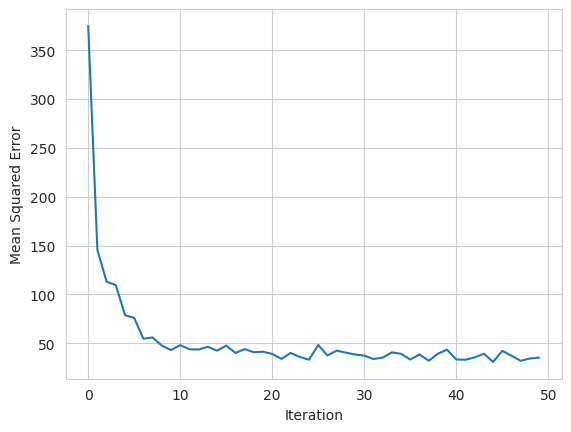

In [30]:
plt.figure()
plt.plot(mean_squared_errors)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.show()

In [31]:
mean_MSEs_model_B = np.mean(mean_squared_errors)
print('Mean MSEs: ', mean_MSEs_model_B)

Mean MSEs:  53.138854705811475


In [32]:
std_MSEs_model_B = np.std(mean_squared_errors)
print('Standard deviation MSEs: ', std_MSEs_model_B)

Standard deviation MSEs:  50.815898182810734


In [34]:
print("""
Model A:
Mean MSEs = {:.2f}
Standard deviation MSEs = {:.2f}

Model B:
Mean MSEs = {:.2f}
Standard deviation MSEs = {:.2f}
""".format(mean_MSEs_model_A, std_MSEs_model_A, mean_MSEs_model_B, std_MSEs_model_B))


Model A:
Mean MSEs = 54.77
Standard deviation MSEs = 10.36

Model B:
Mean MSEs = 53.14
Standard deviation MSEs = 50.82



## C. Increate the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

In [35]:
model_C = regression_model()
model_C.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 9ms/step - loss: 1521.2881 - val_loss: 1513.6177
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 1505.3903 - val_loss: 1499.1589
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 1489.6237 - val_loss: 1484.4169
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 1473.2196 - val_loss: 1469.3628
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 1456.5510 - val_loss: 1453.4703
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 1438.8136 - val_loss: 1437.4545
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 1420.2745 - val_loss: 1420.2739
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 1401.0935 - val_loss: 1402.2349
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 1380.9241 - val_loss: 1383.5248
Epoch 10/100
21/21 [==============================] - 0

In [36]:
y_pred = model_C.predict(X_test)
mean_squared_error(y_test, y_pred)

10/10 [==============================] - 0s 2ms/step


140.87462399064114

In [40]:
model_C = regression_model()
mean_squared_errors = []

for i in range(50):
    print('Iteration {}'.format(i+1))
    mean_squared_errors.append(get_mean_squared_error(model_C, (X_normalized, y), epochs=100))

Iteration 1
10/10 [==============================] - 0s 2ms/step
Iteration 2
10/10 [==============================] - 0s 2ms/step
Iteration 3
10/10 [==============================] - 0s 2ms/step
Iteration 4
10/10 [==============================] - 0s 2ms/step
Iteration 5
10/10 [==============================] - 0s 2ms/step
Iteration 6
10/10 [==============================] - 0s 3ms/step
Iteration 7
10/10 [==============================] - 0s 3ms/step
Iteration 8
10/10 [==============================] - 0s 2ms/step
Iteration 9
10/10 [==============================] - 0s 2ms/step
Iteration 10
10/10 [==============================] - 0s 2ms/step
Iteration 11
10/10 [==============================] - 0s 2ms/step
Iteration 12
10/10 [==============================] - 0s 2ms/step
Iteration 13
10/10 [==============================] - 0s 2ms/step
Iteration 14
10/10 [==============================] - 0s 2ms/step
Iteration 15
10/10 [==============================] - 0s 2ms/step
Iteration 16
10/10 

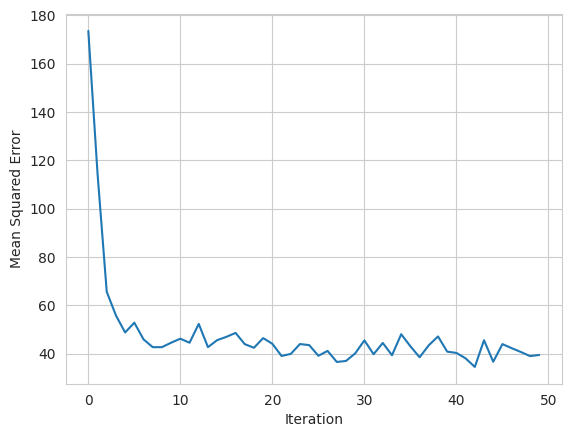

In [41]:
plt.figure()
plt.plot(mean_squared_errors)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.show()

In [42]:
mean_MSEs_model_C = np.mean(mean_squared_errors)
print('Mean MSEs: ', mean_MSEs_model_C)

Mean MSEs:  47.60393299383459


In [43]:
std_MSEs_model_C = np.std(mean_squared_errors)
print('Standard deviation MSEs: ', std_MSEs_model_C)

Standard deviation MSEs:  21.218221338006234


In [44]:
print("""
Model B:
Mean MSEs = {:.2f}
Standard deviation MSEs = {:.2f}

Model C:
Mean MSEs = {:.2f}
Standard deviation MSEs = {:.2f}
""".format(mean_MSEs_model_B, std_MSEs_model_B, mean_MSEs_model_C, std_MSEs_model_C))


Model B:
Mean MSEs = 53.14
Standard deviation MSEs = 50.82

Model C:
Mean MSEs = 47.60
Standard deviation MSEs = 21.22



## D. Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

In [45]:
def regression_model():
    model = keras.Sequential()
    model.add(Dense(10, activation="relu", input_shape=(X.shape[1],)))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mean_squared_error")

    return model

In [46]:
model_D = regression_model()
model_D.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                90        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model_D.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
21/21 [==============================] - 1s 10ms/step - loss: 1587.4242 - val_loss: 1565.0941
Epoch 2/50
21/21 [==============================] - 0s 5ms/step - loss: 1579.0010 - val_loss: 1560.2228
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 1574.2164 - val_loss: 1555.2446
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 1568.4512 - val_loss: 1547.7494
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 1558.5917 - val_loss: 1534.6927
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 1540.2290 - val_loss: 1511.2827
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 1509.8732 - val_loss: 1474.6071
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 1460.1993 - val_loss: 1416.7990
Epoch 9/50
21/21 [==============================] - 0s 5ms/step - loss: 1378.4170 - val_loss: 1328.6931
Epoch 10/50
21/21 [==============================] - 0s 4ms/ste

In [49]:
y_pred = model_D.predict(X_test)
mean_squared_error(y_test, y_pred)

10/10 [==============================] - 0s 4ms/step


86.45577204072256

In [50]:
model_D = regression_model()
mean_squared_errors = []

for i in range(50):
    print('Iteration {}'.format(i+1))
    mean_squared_errors.append(get_mean_squared_error(model_D, (X_normalized, y)))

Iteration 1
10/10 [==============================] - 0s 2ms/step
Iteration 2
10/10 [==============================] - 0s 2ms/step
Iteration 3
10/10 [==============================] - 0s 2ms/step
Iteration 4
10/10 [==============================] - 0s 2ms/step
Iteration 5
10/10 [==============================] - 0s 2ms/step
Iteration 6
10/10 [==============================] - 0s 2ms/step
Iteration 7
10/10 [==============================] - 0s 2ms/step
Iteration 8
10/10 [==============================] - 0s 2ms/step
Iteration 9
10/10 [==============================] - 0s 2ms/step
Iteration 10
10/10 [==============================] - 0s 2ms/step
Iteration 11
10/10 [==============================] - 0s 2ms/step
Iteration 12
10/10 [==============================] - 0s 2ms/step
Iteration 13
10/10 [==============================] - 0s 2ms/step
Iteration 14
10/10 [==============================] - 0s 2ms/step
Iteration 15
10/10 [==============================] - 0s 2ms/step
Iteration 16
10/10 

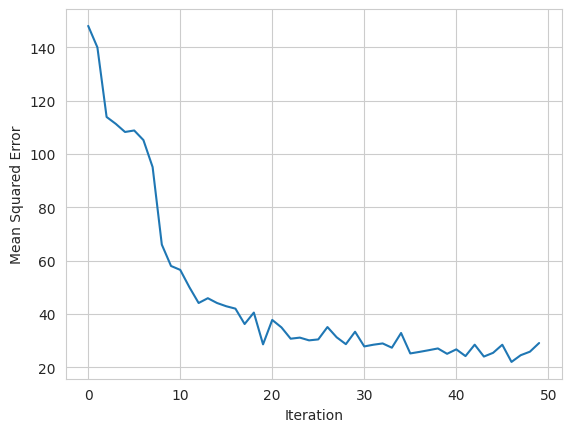

In [51]:
plt.figure()
plt.plot(mean_squared_errors)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.show()

In [52]:
mean_MSEs_model_D = np.mean(mean_squared_errors)
print('Mean MSEs: ', mean_MSEs_model_D)

Mean MSEs:  46.835266426662784


In [53]:
std_MSEs_model_D = np.std(mean_squared_errors)
print('Standard deviation MSEs: ', std_MSEs_model_D)

Standard deviation MSEs:  32.386532360868465


In [54]:
print("""
Model B:
Mean MSEs = {:.2f}
Standard deviation MSEs = {:.2f}

Model D:
Mean MSEs = {:.2f}
Standard deviation MSEs = {:.2f}
""".format(mean_MSEs_model_B, std_MSEs_model_B, mean_MSEs_model_D, std_MSEs_model_D))


Model B:
Mean MSEs = 53.14
Standard deviation MSEs = 50.82

Model D:
Mean MSEs = 46.84
Standard deviation MSEs = 32.39

